In [29]:
import sympy
from sympy import *
from sympy import S, pi, oo, sin, cos, tan, exp, integrate, Symbol
from sympy.ntheory import binomial_coefficients_list
from galgebra import *
from galgebra.ga import Ga
from galgebra.printer import latex
from IPython.display import Math

import matplotlib.pyplot as plt
import numpy as np


# tell sympy to use our printing by default
sympy.init_printing(latex_printer=latex, use_latex='mathjax')

def get_vector_coefficients(multivector):
    # return only the coefficients of e1, e2, e3
    return [c for c in multivector.blade_coefs()[1:4]]

In [2]:
xyz = (x, y, z) = sympy.symbols('x y z', real=True)
o3d = Ga('e_1 e_2 e_3', g=[1, 1, 1], coords=xyz)
grad = o3d.grad

In [3]:
e1, e2, e3 = o3d.mv()
(a1, a2, a3) = sympy.symbols('a1 a2 a3', real=True)
(b1, b2, b3) = sympy.symbols('b1 b2 b3', real=True)
(c1, c2, c3) = sympy.symbols('c1 c2 c3', real=True)
(v1, v2, v3) = sympy.symbols('v1 v2 v3', real=True)
(w1, w2, w3) = sympy.symbols('w1 w2 w3', real=True)
n, m, p, g= sympy.symbols('n m p g')

a = a1*e1 + a2*e2 + a3*e3
b = b1*e1 + b2*e2 + b3*e3
c = c1*e1 + c2*e2 + c3*e3
v = v1*e1 + v2*e2 + v3*e3
w = w1*e1 + w2*e2 + w3*e3

#To create the unit vectors
ah = a/(a.norm())
bh = b/(b.norm())
ch = c/(c.norm())

#To help construct the rotors
m = ah|bh
n = 2+2*m

Triclinic (P) calculations

In [4]:
b.subs([(b1,1), (b2,0), (b3,0)])

e_1

In [5]:
#Actual Rotors
R = (1+bh*ah)/sqrt(n.obj)
Ri = (1+ah*bh)/sqrt(n.obj)
R_n = (1+ah*bh)/sqrt(n.obj)
Ri_n = (1+bh*ah)/sqrt(n.obj)

#Sends vector a to b
ar = R*a*Ri

#Sends vector b to a?
br = R_n*b*Ri_n

In [6]:
ar.subs([(a1, 2), (a2, 3), (a3, 0), (b1, 3), (b2, 0), (b3, 0)])

sqrt(13)*e_1

In [7]:
ar.subs([(a3, 0), (b1, 3), (b2, 0), (b3, 0)])

(2*a1**3 + 2*a1**2*sqrt(a1**2 + a2**2) + 2*a1*a2**2 + a2**2*sqrt(a1**2 + a2**2))*e_1/(2*a1**2 + 2*a1*sqrt(a1**2 + a2**2) + a2**2)

In [8]:
ar.subs([(a1, 4), (a2, 3), (a3, 0), (b1, 3), (b2, 0), (b3, 0)])

5*e_1

In [9]:
ar.subs([(a1, 4), (a2, 6), (a3, 0), (b1, 3), (b2, 0), (b3, 0)])

2*sqrt(13)*e_1

Calculating angle between two vectors

In [10]:
p = a|b
s = a.norm()*b.norm()
t = p/s

In [11]:
g = acos(t.obj)

In [12]:
br.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])

sqrt(10)*e_2

In [13]:
#Vector b rotated onto vector a (0,3,0)
b_n = br.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])

In [14]:
y = a^b
y.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])

-9*e_1^e_2

In [15]:
z = y.norm()
q = y/z
R1 = (cos(pi/4)- q*sin(pi/4))
R2 = (cos(pi/4)+ q*sin(pi/4))

In [16]:
k = R1.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])

In [17]:
j = R2.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])

In [18]:
#Vector b rotated 90° off of vector a
k*b_n*j

sqrt(10)*e_1

In [19]:
b_ninety = k*b_n*j

In [20]:
#Angle between original vectors a and b
g.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])

    ⎛√10⎞
acos⎜───⎟
    ⎝ 10⎠

In [21]:
#Will rotate the 90° rotated vector b by the original angle between the vectors a and b
R1_o = (cos(g/2)- q*sin(g/2))
R2_o = (cos(g/2)+ q*sin(g/2))

In [22]:
#New rotors with original angles
k_n = R1_o.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])
j_n = R2_o.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])

In [23]:
#Final vector
k_n*b_ninety*j_n

e_1 - 3*e_2

In [39]:
def plot_lattice_vectors(u1, u2, u3, u4, ax):
    # place u1, u2, u3 at the origin

    # draw a line from (x01, x02, x03) to (x11, x12, x13)
    # put coordinates into an array like this
    #   x01  x11
    #   x02  x12
    #   x03  x13
    u1_coords = np.zeros((3, 2))
    u1_coords[:, 1] = get_vector_coefficients(u1)
    u2_coords = np.zeros((3, 2))
    u2_coords[:, 1] = get_vector_coefficients(u2)
    u3_coords = np.zeros((3, 2))
    u3_coords[:, 1] = get_vector_coefficients(u3)
    u4_coords = np.zeros((3, 2))
    u4_coords[:, 1] = get_vector_coefficients(u4)

    ax.plot(u1_coords[0, :], u1_coords[1, :], u1_coords[2, :], c='r')
    ax.plot(u2_coords[0, :], u2_coords[1, :], u2_coords[2, :], c='g')
    ax.plot(u3_coords[0, :], u3_coords[1, :], u3_coords[2, :], c='b')
    ax.plot(u4_coords[0, :], u4_coords[1, :], u4_coords[2, :], c='m')

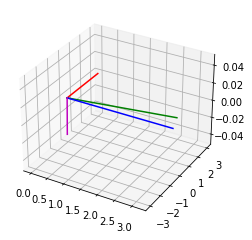

In [40]:
cubic_lattice = [
    (a1, 0), (a2, 3), (a3, 0),
    (b1, 3), (b2, 1), (b3, 0),
    (c1, sqrt(10)), (c2, 0), (c3, 0),
    (v1, 1), (v2, -3), (v3, 0),
]
cubic_a = a.subs(cubic_lattice)
cubic_b = b.subs(cubic_lattice)
cubic_c = c.subs(cubic_lattice)
cubic_v = v.subs(cubic_lattice)

ax = plt.figure().add_subplot(projection='3d')
plot_lattice_vectors(cubic_a, cubic_b, cubic_c, cubic_v, ax)
plt.show()

In [48]:
#Angle between new vector and original a vector
g.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 1), (b2, -3), (b3, 0)])

    ⎛-3⋅√10 ⎞
acos⎜───────⎟
    ⎝   10  ⎠

In [47]:
#Angle between original b vector and new vector
g.subs([(a1, 3), (a2, 1), (a3, 0), (b1, 1), (b2, -3), (b3, 0)])

π
─
2

In [46]:
#Angle between 90° rotated b vector and new vector
g.subs([(a1, sqrt(10)), (a2, 0), (a3, 0), (b1, 1), (b2, -3), (b3, 0)])

    ⎛√10⎞
acos⎜───⎟
    ⎝ 10⎠

In [49]:
#Angle between original vectors
g.subs([(a1, 0), (a2, 3), (a3, 0), (b1, 3), (b2, 1), (b3, 0)])

    ⎛√10⎞
acos⎜───⎟
    ⎝ 10⎠